In [19]:
import random
import sys
sys.path.append("C:\\Users\\hunmi\\OneDrive\\바탕 화면\\Project-Covid-19\\ssj")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

import Project_DF_SJ as sj
import jhoon1 as jh

In [24]:
# df_upper=sj.dfc_1
# df_rower=sj.dfc_2
# df_location=jh.df_world_map
# df_location.rename(columns={'Country' : '국가명',
#                       'lat':'위도','lng':'경도'},inplace=True)
# df_upper.reset_index(drop=False, inplace=True)
# df_rower.reset_index(drop=False, inplace=True)


# df1=pd.merge(df_upper,df_location,how='outer' ,on='국가명')
# df2=pd.merge(df_rower,df_location,how='outer' ,on='국가명')

# #상위 21개국가 위경도 추가
# df1=df1.iloc[:21]
# df1=df1.set_index('국가명')

# df1.loc['UAE']['위도']=23.7139
# df1.loc['UAE']['경도']=54.3035



# #하위 19개 국가 위경도 추가
# df2=df2.iloc[:19]
# df2=df2.set_index('국가명')

# df2.loc['CAR']['위도']=6.5741
# df2.loc['CAR']['경도']=20.4869
# df2.loc['DRC']['위도']=-2.6046
# df2.loc['DRC']['경도']=22.2650

In [3]:
#랜덤5개 국가별 검사률,확진률,사망률 함수
def bargraph(df):
    import matplotlib.pyplot as plt
    random5_df = df.sample(n=5)
    fig=plt.figure(figsize=(15,5))
    ax1=fig.add_subplot(1,3,1)
    ax2=fig.add_subplot(1,3,2)
    ax3=fig.add_subplot(1,3,3)

    plt.style.use('Solarize_Light2')
    x1 = random5_df.index
    y1 = random5_df['검사수율(%)']
    ax1.bar(x1, y1,color=['#81F7BE','#F6CECE','#F6CEF5','#D0A9F5','#A9F5F2'],width=0.5)
    ax1.set_xlabel('나라')
    ax1.set_ylabel('검사수율',rotation=90)
    ax1.set_xticks(range(len(random5_df.index)))
    ax1.set_xticklabels(labels=random5_df.index,fontsize=10)
    ax1.set_title('나라별 검사률',fontweight='bold',fontsize=15,color='gray')

    x2 = random5_df.index
    y2 = random5_df['확진수율(%)']
    ax2.bar(x2, y2,color=['#81F7BE','#F6CECE','#F6CEF5','#D0A9F5','#A9F5F2'],width=0.5)
    ax2.set_xlabel('나라')
    ax2.set_ylabel('확진률',rotation=90)
    ax2.set_xticks(range(len(random5_df.index)))
    ax2.set_xticklabels(labels=random5_df.index,fontsize=10)
    ax2.set_title('나라별 확진률',fontweight='bold',fontsize=15,color='gray')

    x3 = random5_df.index
    y3 = random5_df['사망수율(%)']
    ax3.bar(x3, y3,color=['#81F7BE','#F6CECE','#F6CEF5','#D0A9F5','#A9F5F2'],width=0.5)
    ax3.set_xlabel('나라')
    ax3.set_ylabel('사망률',rotation=90)
    ax3.set_xticks(range(len(random5_df.index)))
    ax3.set_xticklabels(labels=random5_df.index,fontsize=10)
    ax3.set_title('나라별 사망률',fontweight='bold',fontsize=15,color='gray')
    plt.show()

In [4]:
#scatter 함수
def scattergraph(merged_df): 
    plt.style.use('ggplot')
    plt.scatter(merged_df['검사수율(%)'], merged_df['사망수율(%)'])
    plt.title('검사빈도에따른 전세계사망률')
    plt.xlabel('코로나 검사비율')
    plt.ylabel('사망률')
    plt.show()

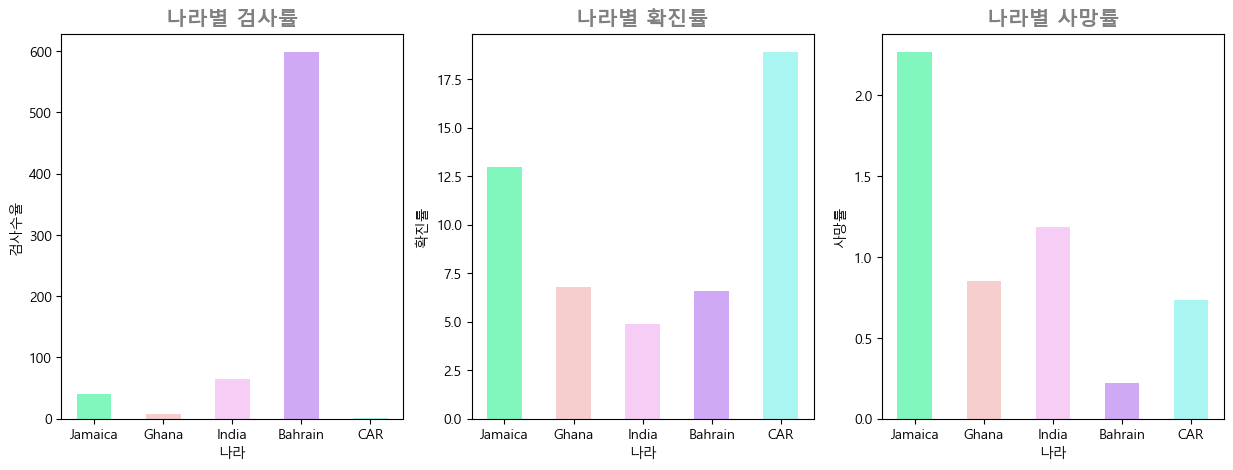

None


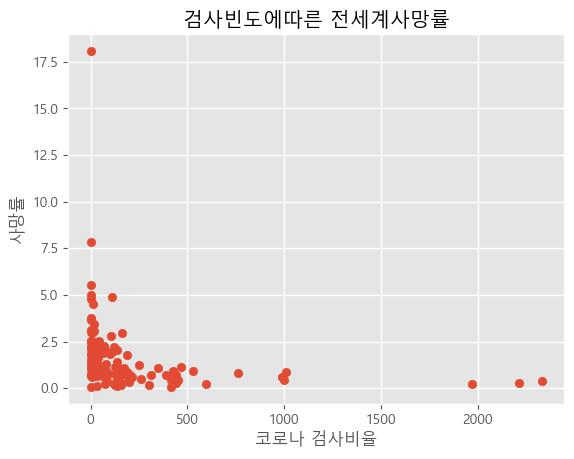

None


In [5]:
print(bargraph(sj.df_data))
print(scattergraph(sj.df_data))




In [14]:
df=sj.df_data.sort_values('인구밀도',ascending=False)
df.head(10)
mildo=df['인구밀도'].tolist()

In [7]:
def mapdata(data):
    data=data.sort_values('인구밀도',ascending=False)
    from folium import CircleMarker
    world_map=folium.Map(location=[0,0],zoom_start=1.5,tiles='stamentoner')

# 데이터프레임에서 위도와 경도, 인구밀도, 확진수 열 추출
    locations = data[['위도', '경도']].values.tolist()
    mildos = data['인구밀도'].tolist()
    cases = data['확진수율(%)'].tolist()

# 최대 총 확진자 수 계산
    max_cases = max(cases)

# CircleMarker를 사용하여 인구밀도와 확진수에 따라 원을 지도에 추가
    for location, mildo, case in zip(locations, mildos, cases):
# 인구밀도에 따라 원 색깔 
        if mildo >= mildos[40]:
            color = '#cc0000'  # 빨강
        elif mildo <= mildos[-50]:
            color = '#0000cc'  # 파랑
        else:
            color = '#ffff00'  # 노랑

        CircleMarker(
            location=location,
            radius=case / max_cases * 50,
            color=color,
            fill=True,
            fill_color=color,
        ).add_to(world_map)

    return world_map

In [17]:
new_df = df.copy()
new_df=new_df.drop(['S. Korea','Algeria'])

In [18]:
new_df['확진수율(%)']=new_df['확진수율(%)'].pipe(jh.zscore)
mapdata(new_df)

In [27]:
def mapworld(df):
    import plotly.express as px

    fig = px.choropleth(
        data_frame=df,
        locations=df.index,
        locationmode='country names',
        color='확진수',
        template='plotly_dark',
        title='국가별 확진자수'
    )

    fig.show()
mapworld(df)